# **THE SPARKS FOUNDATION**
# Data Science & Business Analytics Internship
# By **Kamran khan**
# TASK-4: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
## As a security/defense analyst, try to find out the hot zone of terrorism.
## What all security issues and insights you can derive by EDA?

### Importing Libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

### Loading the dataset 

In [82]:
data = pd.read_csv("globalterrorismdb_0718dist.csv")

C:\Users\Hp\anaconda3\envs\NCAI\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [83]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Shape of the dataSet

In [84]:
data.shape

(181691, 135)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


# **Handling Missing Values**

### Dropping the Row which have more the 80 value missing out of 135

In [86]:
total_columns = data.shape[1]

# Percentage_of_Missing_values_in_rows
missing = data.isnull().sum(axis =1)/total_columns*100

missing.sort_values(ascend ing =False).head(15)

20969    70.370370
16777    69.629630
29887    69.629630
29424    69.629630
19310    69.629630
64159    69.629630
29652    69.629630
29819    69.629630
56966    69.629630
65095    69.629630
56964    69.629630
56965    69.629630
7193     68.888889
24129    68.888889
19306    68.888889
dtype: float64

### Dropping

In [87]:
# indexes of rows which have missing values greater than 60 percentage 
m_index = data.loc[missing > 60].index.tolist()

#Dropping the rows which have missing values greater than 60 percentage  
data = data.drop(m_index)

In [88]:
data.shape

(122146, 135)

### Deleting Columns if the have above 80% Missing values

In [89]:
total = data.shape[0]

# Displaying the Percentage of Missing values in the columns
missing_val = (data.isnull().sum()/total)*100

missing_val.sort_values(ascending =False).head(20)

gsubname3           99.983626
weapsubtype4        99.942692
weapsubtype4_txt    99.942692
weaptype4           99.940235
weaptype4_txt       99.940235
claimmode3          99.891114
claimmode3_txt      99.891114
gsubname2           99.869009
divert              99.755211
claim3              99.739656
guncertain3         99.738837
gname3              99.735562
attacktype3_txt     99.649600
attacktype3         99.649600
ransomnote          99.579192
ransompaidus        99.548900
ransomamtus         99.539076
claimmode2          99.495685
claimmode2_txt      99.495685
ransompaid          99.389255
dtype: float64

### Deleting

In [90]:
total = data.shape[0]
for_del =[]
for i in data.columns:
    if (data[i].isnull().sum()/total)*100 > 80:
        for_del.append(i)
        
data = data.drop(for_del, axis =1)

In [91]:
data.shape

(122146, 67)

# **Handling Unique Values**

In [92]:
# Checking Unique Values in the columns
data.nunique().sort_values(ascending  =False).head(10)

eventid      122146
summary      112165
scite1        83817
scite2        62246
target1       54789
location      44075
latitude      41013
longitude     40667
scite3        36083
city          28695
dtype: int64

In [93]:
# Droping the  ["eventid", "summary"] Columns
data = data.drop(["eventid", "summary"], axis =1)

In [94]:
data.shape

(122146, 65)

### Filling some Missing Values with 0

In [95]:
data['nwound'] = data['nwound'].fillna(0)
data['nkill'] = data['nkill'].fillna(0)

## Data Visualization

### Top Affected Countries with Terrorist Activities

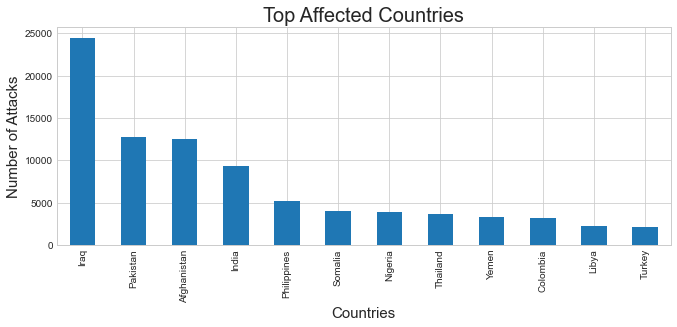

In [96]:
data.country_txt.value_counts()[:12].plot(kind ="bar", figsize=(11,4))
plt.title('Top Affected Countries',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xlabel("Countries",fontsize=15)
plt.show()

### Top Affected Region with Terrorist Activities

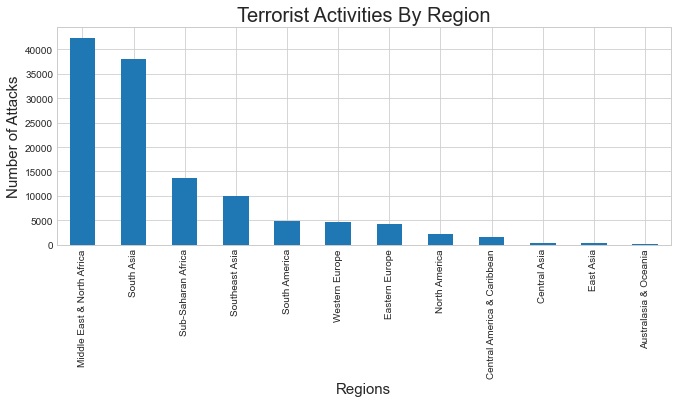

In [97]:
data.region_txt.value_counts().plot(kind ="bar", figsize=(11,4))
plt.title('Terrorist Activities By Region',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xlabel("Regions",fontsize=15)
plt.show()

### Top Cities Affected

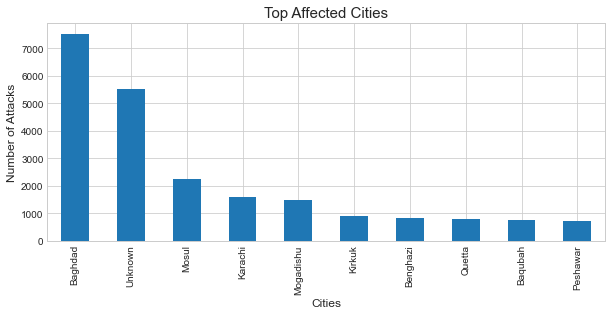

In [98]:
data.city.value_counts()[:10].plot(kind = "bar", figsize =(10,4))
plt.title('Top Affected Cities',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=12)
plt.xlabel("Cities",fontsize=12)
plt.show()

### Number of Attacks per Year

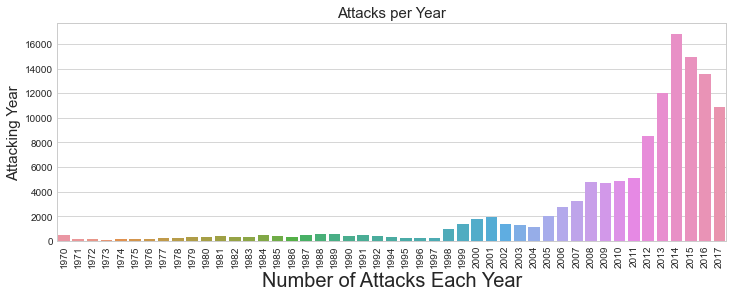

In [99]:
plt.figure(figsize =(12,4))
sns.countplot(x= "iyear", data = data)

plt.xlabel('Number of Attacks Each Year',fontsize=20)
plt.ylabel('Attacking Year',fontsize=15)
plt.title('Attacks per Year',fontsize=15)
plt.xticks(rotation =90)
plt.show()

### Number of Kills per Year

Text(0, 0.5, 'Year')

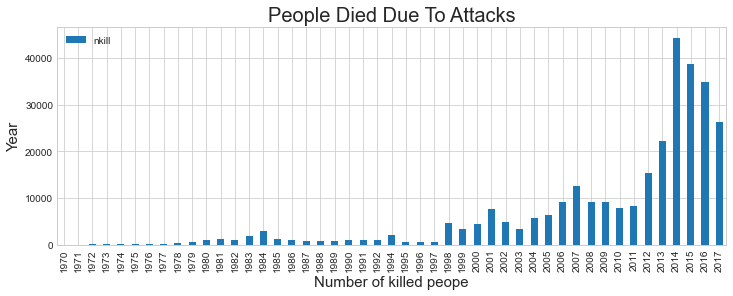

In [100]:
data[['iyear','nkill']].groupby(['iyear']).sum().plot(kind ="bar", figsize =(12,4))
plt.title("People Died Due To Attacks",fontsize=20)
plt.xlabel("Number of killed peope",fontsize=15)
plt.ylabel('Year',fontsize=15)

### Types of Departments Affected

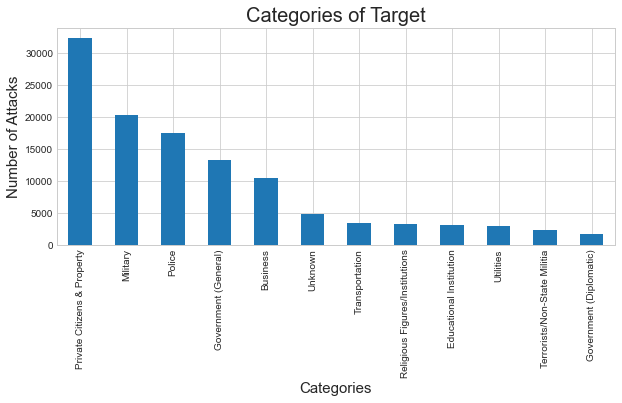

In [101]:
data['targtype1_txt'].value_counts()[:12].plot(kind ="bar", figsize =(10, 4))
plt.title('Categories of Target',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xlabel("Categories",fontsize=15)
plt.show()

### Types of Weapons used in Attacks

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Explosives'),
  Text(1, 0, 'Firearms'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Incendiary'),
  Text(4, 0, 'Melee')])

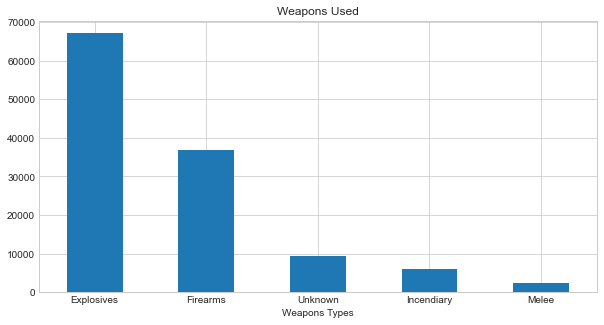

In [102]:
data['weaptype1_txt'].value_counts()[:5].plot(kind ="bar", figsize=(10,5))
plt.title('Weapons Used')
plt.xlabel("Weapons Types")
plt.xticks(rotation=0)

### Due to Which types of attacks Peoples Died the most

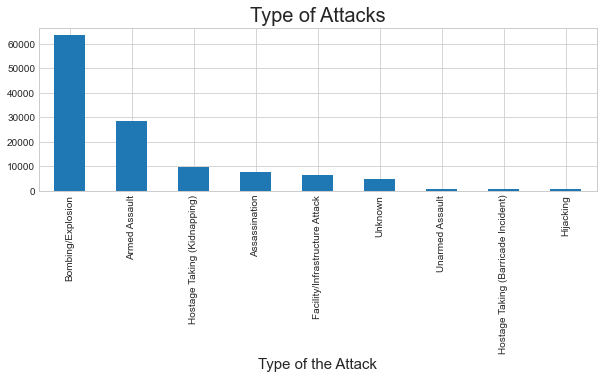

In [103]:
data.attacktype1_txt.value_counts().plot(kind ="bar", figsize =(10,3))
plt.title('Type of Attacks',fontsize=20)
plt.xlabel("Type of the Attack",fontsize=15)
plt.show()

### Top 10 terrorist groups

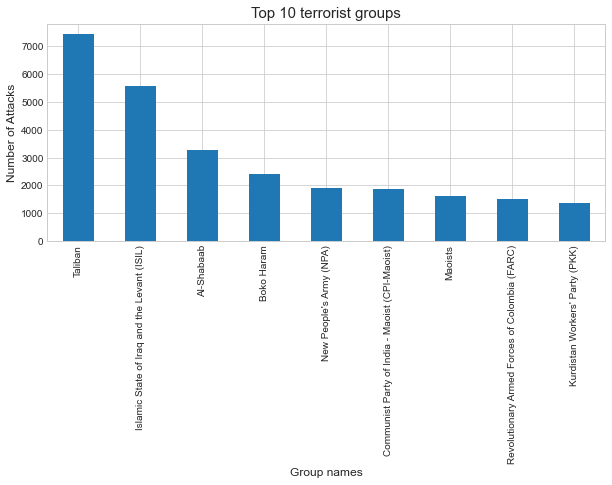

In [104]:
data.gname.value_counts()[1:10].plot(kind ="bar", figsize =(10,4))
plt.title("Top 10 terrorist groups",fontsize=15)
plt.xlabel("Group names",fontsize=12)
plt.ylabel("Number of Attacks",fontsize=12)
plt.show()

# Conclusions

### Hot zones of Terrorism
* **Iraq** is the most effected Country with most number of  attacks.
* **Middle East & North Africa** is the most effected Regions with most attacks.
* **Baghdad** city is mostly effected by terrorist 



### Other Analysis
* **2014** is the most affected year with most number of attacks and also most number of kills recorded.
* **Private Citizens & Property** is the most effected Secter.
* **Explosives** is the mostly used weapons in the attacks and also the most number of peoples died from it.
* **Taliban** is a terrorist group with most number of attacks than any group.